# Feature Engineering

## 1. Feature Construction

In [1]:
import pandas as pd

room_length = [18, 20, 10, 12, 18, 11]
room_breadth = [20, 20, 10, 11, 19, 10]
room_type = ['Big', 'Big', 'Normal', 'Normal', 'Big', 'Normal']

data = pd.DataFrame({
    'Length': room_length,
    'Breadth': room_breadth,
    'Type': room_type
})
print(data)

   Length  Breadth    Type
0      18       20     Big
1      20       20     Big
2      10       10  Normal
3      12       11  Normal
4      18       19     Big
5      11       10  Normal


In [3]:
data['Area']=data['Length']*data['Breadth']
print(data)

   Length  Breadth    Type  Area
0      18       20     Big   360
1      20       20     Big   400
2      10       10  Normal   100
3      12       11  Normal   132
4      18       19     Big   342
5      11       10  Normal   110


## 2. Feature Transformation

In [4]:
#Categorical to Numerical Data
import pandas as pd
age = [18, 20, 23, 19, 18, 22, 21]
city = ['City A','City B','City B','City A',
        'City A', 'City C', 'City B']

data = pd.DataFrame({'age': age, 'city': city})
print(data)

   age    city
0   18  City A
1   20  City B
2   23  City B
3   19  City A
4   18  City A
5   22  City C
6   21  City B


In [5]:
#For Nominal Data
dummy_features=pd.get_dummies(data['city'])import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()
iris
print(dummy_features)

   City A  City B  City C
0       1       0       0
1       0       1       0
2       0       1       0
3       1       0       0
4       1       0       0
5       0       0       1
6       0       1       0


In [8]:
data_age=pd.DataFrame(data,columns=['age'])
print(data_age)

   age
0   18
1   20
2   23
3   19
4   18
5   22
6   21


In [9]:
data_mod=pd.concat([data_age,dummy_features],axis=1)
print(data_mod)

   age  City A  City B  City C
0   18       1       0       0
1   20       0       1       0
2   23       0       1       0
3   19       1       0       0
4   18       1       0       0
5   22       0       0       1
6   21       0       1       0


In [10]:
#Another Method
data_mod1=pd.concat([data_age.reset_index(drop=True), dummy_features], axis=1)
print(data_mod1)

   age  City A  City B  City C
0   18       1       0       0
1   20       0       1       0
2   23       0       1       0
3   19       1       0       0
4   18       1       0       0
5   22       0       0       1
6   21       0       1       0


In [11]:
import pandas as pd
marks_science = [78, 56, 87, 91, 45, 62]
marks_maths = [75, 62, 90, 95, 42, 57]
grade = ['B', 'C', 'A', 'A', 'D', 'B']

data = pd.DataFrame({'Science marks': marks_science,
                     'Maths marks': marks_maths, 
                     'Total grade': grade})
print(data)

   Science marks  Maths marks Total grade
0             78           75           B
1             56           62           C
2             87           90           A
3             91           95           A
4             45           42           D
5             62           57           B


In [12]:
#For Ordinal Data
#Option 1
target=data['Total grade'].replace(['A','B','C','D'],[0,1,2,3])
predictors=data.iloc[:,0:2]
data_mod=pd.concat([predictors,target],axis=1)
print(data_mod)

   Science marks  Maths marks  Total grade
0             78           75            1
1             56           62            2
2             87           90            0
3             91           95            0
4             45           42            3
5             62           57            1


In [16]:
#Option 2(The better approach)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
#Option 1
le.fit(data['Total grade'])
print(le.classes_)
data['Total grade']=le.transform(data['Total grade'])#Assigns numbers starting from 0 based on dictionary sequence(A..B..C...)
#Option 2
data['Total grade']=le.fit_transform(data['Total grade'])
print(data)

[0 1 2 3]
   Science marks  Maths marks  Total grade
0             78           75            1
1             56           62            2
2             87           90            0
3             91           95            0
4             45           42            3
5             62           57            1


In [2]:
#Numerical to Categorical Data
import pandas as pd
apartment_area = [4720, 2430, 4368, 3969, 6142, 7912]
apartment_price = [2360000, 1215000, 2184000, 1984500, 3071000, 3956000]
data = pd.DataFrame({'Area': apartment_area, 'Price': apartment_price})
print(data)

   Area    Price
0  4720  2360000
1  2430  1215000
2  4368  2184000
3  3969  1984500
4  6142  3071000
5  7912  3956000


In [3]:
import numpy as np 
data['Price Category']=np.where(data['Price']>3000000,'High',np.where(data['Price']<2000000,'Low','Medium'))
print(data)

   Area    Price Price Category
0  4720  2360000         Medium
1  2430  1215000            Low
2  4368  2184000         Medium
3  3969  1984500            Low
4  6142  3071000           High
5  7912  3956000           High


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Price Category'] = le.fit_transform(data['Price'])
print(data)

   Area    Price  Price Category
0  4720  2360000               3
1  2430  1215000               0
2  4368  2184000               2
3  3969  1984500               1
4  6142  3071000               4
5  7912  3956000               5


## 3. Feature Extraction

### Principal Component Analysis

In [9]:
import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()
predictors=iris.data
target=iris.target
#iris
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pc=pca.fit_transform(predictors)
pc_df=pd.DataFrame(data=pc,columns=['PC 1','PC 2'])#Here data is used in syntax(Not to be confused with 'data' DataFrame)
pc_df

,PC 1,PC 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [11]:
target1=target.reshape(-1,1)
target_df=pd.DataFrame(target1,columns=['class'])
data_mod=pd.concat([pc_df,target_df],axis=1)
data_mod

,PC 1,PC 2,class
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


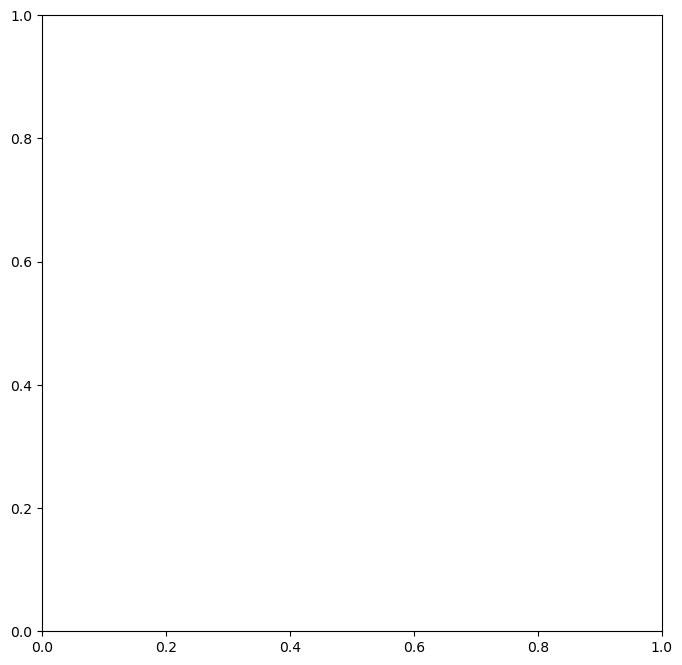

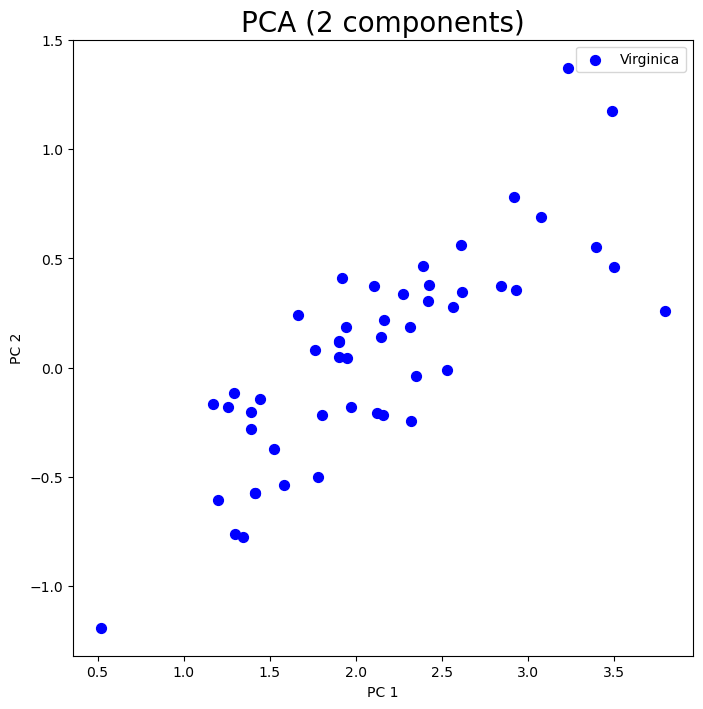

In [15]:
# Plotting
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
pca_plot = fig.add_subplot(1, 1, 1)
fig, pca_plot = plt.subplots(figsize=(8, 8))
pca_plot.set_xlabel('PC 1')
pca_plot.set_ylabel('PC 2')
pca_plot.set_title('PCA (2 components)', fontsize=20)

colors = ['r', 'y', 'b']
classes = [0, 1, 2]
labels = ['Setosa', 'Versicolor', 'Virginica']

for class_value, color, label in zip(classes, colors, labels):
    indices = data_mod['class'] == class_value
    
# Creates a boolean mask (True/False values).
# True wherever the row belongs to the current class.
# Used to select data points for that class.
pca_plot.scatter(data_mod.loc[indices,'PC 1'],data_mod.loc[indices, 'PC 2'],c=color,s=50,label=label)
pca_plot.legend()
plt.show()